In [20]:
!pip install langchain langsmith langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 MB/s eta 0:00:00


In [17]:
!pip install langchain langchain_groq langchain_community

In [10]:
from google.colab import userdata
import os
groq_api_key=userdata.get('Groq_API_Key')
langchain_api_key=userdata.get('LangChain_API_Key')
os.environ['LANGCHAIN_API_KEY'] = userdata.get('LangChain_API_Key')
os.environ['GROQ_API_KEY']=userdata.get('Groq_API_Key')
os.environ['LANGCHAIN_TRACING_V2']='true'
os.environ['LANGCHAIN_PROJECT']='CourseLanggraph'

In [11]:
from langchain_groq import ChatGroq

In [13]:
llm=ChatGroq(groq_api_key=groq_api_key , model_name="gemma2-9b-it")

In [14]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x78f6411131f0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x78f641111600>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

## **Start Building Chabot using LangGraph**

In [21]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph , START , END
from langgraph.graph.message import add_messages

In [22]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [23]:
graph_builder

In [24]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}


In [25]:
graph_builder.add_node("chatbot" , chatbot)

In [26]:
graph_builder.add_edge(START , "chatbot")
graph_builder.add_edge("chatbot" , END)

In [27]:
graph=graph_builder.compile()

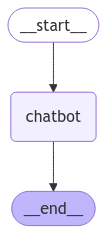

In [28]:
from IPython.display import Image , display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [30]:
while True:
  user_input=input("User :")
  if user_input.lower() in ["quite" , "q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':('user' , user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant :" , value["messages"].content)


User :hello
dict_values([{'messages': AIMessage(content='Hello! 👋  How can I help you today? 😄\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 4.1e-07, 'queue_time': 0.021464788000000002, 'total_time': 0.027273137}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-00fb0314-fb14-4df4-aadc-083ea48876eb-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})}])
content='Hello! 👋  How can I help you today? 😄\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 4.1e-07, 'queue_time': 0.021464788000000002, 'total_time': 0.027273137}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-00f